# Simulating a Cyclotron

## Introduction

This code simulates a cyclotron, a simple particle accelerator. The code simulates the motion of a single particle in the accelerator, calculates its final velocity, and plots the path of the particle. There are some suggestions for investigation questions and the end, but you are welcome to play around with the parameters in the code, add or subtract different pieces, and see how it behaves for yourself as you decide what you want to use it to investigate.

## Simulation of the Cyclotron

First, we import our standard libraries: Numpy, Sympy, and matplotlib.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Next, we will create numpy arrays for the particle's position and velocity. These will only ever hold three numbers (the x, y, and z positions/velocities of the particle). We initialize these to 0, so that the particle starts at the origin with 0 velocity. 

We will also create 2 more arrays, which will store the x and y positions of the particle. These will expand to hold all of the different values of the particle's position over time, which we will use to create a plot of the motion later on.

In [2]:
particlepos = np.array([0.0,0.0,0.0])
particlev = np.array([0.0,0.0,0.0]) #Set the initial particle speed to 0

particleposx = [particlepos[0]] #create an array for the x position of the particle
particleposy = [particlepos[1]] #create an array for the y position of the particle

Now, we will enter some physical constants. We will give the particle the charge and mass of a proton.

For the cyclotron itself, we will set the accelerating voltage between the two "D's" (halves of the accelerator) to 50000V and their separation to 90 micrometers. Using these two parameters, we define the electric field between the them. Within the "D's" we will set the B-field to 1.5T. We will give them a radius (r_cyclotron) of 5cm. 

In [3]:
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton

V = 50000 #Set voltage between the plates to 50V
d = 90e-6 #Set the separation between the plates to 90 micrometers
E_0 = V/(d) #define the electric field based on voltage between the D's and separation

B = np.array([0.0,0.0,1.5]) #Set magnetic field to 1.5T in the +Z direction
r_cyclotron = .05 #set the radius of the D's to 5cm

Next, we define the cyclotron frequency, which is the frequency that determines when the electric field should switch to impart maximum speed to the particle. Assuming the gap between the D's is small, we can find this by setting the magnetic force equal to the expression for circular motion: $$F = qvB = \frac{M v^2}{r}$$ $$r = \frac{mv}{qB}$$ And then substituting this expression into the expression for the time for one full rotation, $$T = \frac{2 \pi r}{v} = \frac{2 \pi m}{qB}$$

Converting this into angular frequency, we end up with $$\omega_{cyclotron}=\frac{qB}{m}$$

Here we also initialize the time, and set the timestep to 1 picosecond. 

In [4]:
w = q*np.linalg.norm(B)/m #define the cyclotron frequency 

t = 0 #initialize time to 0
dt = 5e-12 #Set timestep to 5 picoseconds

Now, we are ready to begin to simulate the motion of the proton. We use a loop which runs while the magnitude of the proton's position, and create a vector (numpy array) that represents the force on the particle.

In [5]:
while (np.linalg.norm(particlepos) < r_cyclotron): #loop while the magnitude of the proton's position remains within the cyclotron radius
    
    Fnet = np.array([0.0,0.0,0.0]) #create a vector for the net force on the particle.
    
    if np.absolute(particlepos[0]) < d/2: #if the particle is between the two D's calculate the electric force
        Fnet[0] = q*E_0*np.cos(w*t)
    else: #if the particle is not, calculate the magnetic force
        Fnet = q*np.cross(particlev,B)

    particlev = particlev + Fnet*dt/m #Update the velocity of the particle
    particlepos = particlepos + particlev*dt #Use velocity to update the position of the particle
    
    particleposx = np.append(particleposx, particlepos[0]) #append the x position to the x-position list
    particleposy = np.append(particleposy, particlepos[1]) #append the y position to the y-position list
    t = t + dt #update the timestep
    
print("The final speed of the particle is", np.linalg.norm(particlev), "m/s")

The final speed of the particle is 6409852.675616209 m/s


Now, we will plot the resulting motion of the particle in 2D. We expect that it should have a spiral shape (for example, see http://hyperphysics.phy-astr.gsu.edu/hbase/magnetic/cyclot.html)

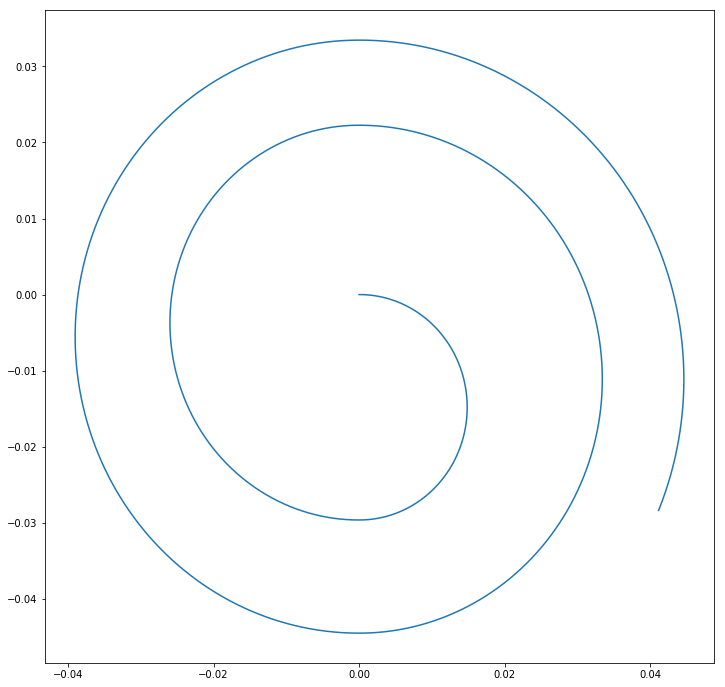

In [6]:
plt.figure(figsize=(12,12)) #create the figure
plt.plot(particleposx, particleposy) #create the plot

## Additional questions you might investigate

1. In real life, cyclotrons are used for treating cancer. How much voltage would you need to achieve the energy to destroy a cancer cell? (about 100-250 MeV, according to *Goitein, M., Lomax, A. J., & Pedroni, E. S. (2002). Treating cancer with protons. Physics Today, 55(9), 45–50. http://doi.org/10.1063/1.1522215*)
    * Or, what size of cyclotron would you need at a given voltage?
2. These particles can quickly start to approach the speed of light. How does this result change with the addition of relativistic factors?
3. Particle accelerators have been proposed as a possible method of disposing of spent nuclear fuel, as described here: https://www.symmetrymagazine.org/article/february-2012/taking-the-heat-out-of-nuclear-waste Could a cyclotron be used for this type of application?
4. What happens if you use a different kind of pulse, like a square wave instead of a sin wave? What if you alter the phase of the wave? 
5. What happens if you want to produce a stream of particles instead of just one? What if you use electrons instead of protons?

*(Note that these are just meant to be suggestions—feel free to investigate any question you find interesting!)*